<a href="https://colab.research.google.com/github/aa1reXo/Agentic-AI/blob/main/Ax_QLC_05_Building_an_Agentic_Corrective_RAG_System_with_LangGraph_DJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Building an Agentic Corrective RAG System with LangGraph

This project will cover a full hands-on workflow and demonstration of how to build an Agentic Corrective RAG (CRAG) System with LangGraph

The idea would be to implement the workflow taking inspiration from the [Corrective Retrieval Augmented Generation](https://arxiv.org/pdf/2401.15884) research paper.

The main challenge of RAG systems include:

- Poor Retrieval can lead to issues in LLM response generation
- Bad retrieval or lack of information in the vector database can also lead to out of context or hallucinated answers

The idea is to couple a RAG system with a few checks in place and perform web searches if there is a lack of relevant context documents to the given user query as follows:

![](https://i.imgur.com/uhybMhT.png)


We can build this as an agentic RAG system by having a specific functionality step as a node in the graph and use LangGraph to implement it. Key steps in the node will include prompts being sent to LLMs to perform specific tasks as seen in the detailed workflow below:

![](https://i.imgur.com/eV87ZwX.gif)


___Created By: [Dipanjan (DJ)](https://www.linkedin.com/in/dipanjans/)___


## Install OpenAI, and LangChain dependencies

In [ ]:
!pip install langchain==0.3.14
!pip install langchain-google-genai==2.0.9
!pip install langchain-community==0.3.14
!pip install langgraph==0.2.64
!pip install langchain-huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.9/326.9 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.8
    Uninstalling langsmith-0.3.8:
      Successfully uninstalled langsmith-0.3.8
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.18
    Uninstalling langchain-0.3.18:
      Successfully uninstalled langchain-0.3.18
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.6/142.6 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install langchain-chroma==0.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.7 MB/s eta 0:

## Enter Open AI API Key

In [ ]:
from getpass import getpass

# OPENAI_KEY = getpass('Enter your OpenAI Key: ')
GEMINI_API_KEY = getpass('Enter your Google Gemini API Key: ')

Enter your Google Gemini API Key: ··········


## Enter Tavily Search API Key

Get a free API key from [here](https://tavily.com/#api)

In [ ]:
TAVILY_API_KEY = getpass('Enter Tavily Search API Key: ')

Enter Tavily Search API Key: ··········


## Setup Environment Variables

In [ ]:
import os

# os.environ['OPENAI_API_KEY'] = OPENAI_KEY
os.environ["GOOGLE_API_KEY"] = GEMINI_API_KEY
os.environ['TAVILY_API_KEY'] = TAVILY_API_KEY

## Build a Search Index for Wikipedia Data

We will build a vector database for retrieval and search by taking a subset of documents from wikipedia, similar to our project from previous modules

### Open AI Embedding Models

LangChain enables us to access Open AI embedding models which include the newest models: a smaller and highly efficient `text-embedding-3-small` model, and a larger and more powerful `text-embedding-3-large` model.

In [ ]:
# you can also use huggingface open source model embeddings
# make sure to !pip install langchain-huggingface first
from langchain_huggingface import HuggingFaceEmbeddings

# check out model details here: https://huggingface.co/mixedbread-ai/mxbai-embed-large-v1
model_name = "mixedbread-ai/mxbai-embed-large-v1"

hf_embed_model = HuggingFaceEmbeddings(
    model_name=model_name,
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/114k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/677 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

### Get the wikipedia data

In [ ]:
# if you can't download using the following code
# go to https://drive.google.com/file/d/1oWBnoxBZ1Mpeond8XDUSO6J9oAjcRDyW download it
# manually upload it on colab
!gdown 1oWBnoxBZ1Mpeond8XDUSO6J9oAjcRDyW

Downloading...
From (original): https://drive.google.com/uc?id=1oWBnoxBZ1Mpeond8XDUSO6J9oAjcRDyW
From (redirected): https://drive.google.com/uc?id=1oWBnoxBZ1Mpeond8XDUSO6J9oAjcRDyW&confirm=t&uuid=769a0aa0-9dd0-4726-9220-394d2d68efee
To: /content/simplewiki-2020-11-01.jsonl.gz
100% 50.2M/50.2M [00:00<00:00, 148MB/s]


### Load and Chunk Documents

In [ ]:
import gzip
import json
from langchain.docstore.document import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter

wikipedia_filepath = 'simplewiki-2020-11-01.jsonl.gz'

docs = []
with gzip.open(wikipedia_filepath, 'rt', encoding='utf8') as fIn:
    for line in fIn:
        data = json.loads(line.strip())
        #Add all paragraphs
        #passages.extend(data['paragraphs'])
        #Only add the first paragraph
        docs.append({
                        'metadata': {
                                        'title': data.get('title'),
                                        'article_id': data.get('id')
                        },
                        'data': ' '.join(data.get('paragraphs')[0:3]) # restrict data to first 3 paragraphs to run later modules faster
        })

# We subset our data so we only use a subset of wikipedia documents to run things faster
docs = [doc for doc in docs for x in ['india']
              if x in doc['data'].lower().split()]
# Create docs
docs = [Document(page_content=doc['data'],
                 metadata=doc['metadata']) for doc in docs]
# Chunk docs
splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=300)
chunked_docs = splitter.split_documents(docs)

In [ ]:
len(chunked_docs)

1322

In [ ]:
chunked_docs[:3]

[Document(metadata={'title': 'Basil', 'article_id': '73985'}, page_content='Basil ("Ocimum basilicum") ( or ) is a plant of the Family Lamiaceae. It is also known as Sweet Basil or Tulsi. It is a tender low-growing herb that is grown as a perennial in warm, tropical climates. Basil is originally native to India and other tropical regions of Asia. It has been cultivated there for more than 5,000 years. It is prominently featured in many cuisines throughout the world. Some of them are Italian, Thai, Vietnamese and Laotian cuisines. It grows to between 30–60\xa0cm tall. It has light green, silky leaves 3–5\xa0cm long and 1–3\xa0cm broad. The leaves are opposite each other. The flowers are quite big. They are white in color and arranged as a spike. The plant tastes somewhat like anise, with a strong, pungent, sweet smell. Basil is very sensitive to cold. It is best grown in hot, dry conditions. While most common varieties are treated as annuals, some are perennial, including African Blue a

### Create a Vector DB and persist on disk

Here we initialize a connection to a Chroma vector DB client, and also we want to save to disk, so we simply initialize the Chroma client and pass the directory where we want the data to be saved to.

In [ ]:
from langchain_chroma import Chroma

# create vector DB of docs and embeddings - takes < 1 min on Colab
chroma_db = Chroma.from_documents(documents=chunked_docs,
                                  collection_name='rag_wikipedia_db',
                                  embedding=hf_embed_model,
                                  # need to set the distance function to cosine else it uses euclidean by default
                                  # check https://docs.trychroma.com/guides#changing-the-distance-function
                                  collection_metadata={"hnsw:space": "cosine"},
                                  persist_directory="./wikipedia_db")

### Setup a Vector Database Retriever

Here we use the following retrieval strategy:

- Similarity with Threshold Retrieval


### Similarity with Threshold Retrieval

We use cosine similarity here and retrieve the top 3 similar documents based on the user input query and also introduce a cutoff to not return any documents which are below a certain similarity threshold

In [ ]:
similarity_threshold_retriever = chroma_db.as_retriever(search_type="similarity_score_threshold",
                                                        search_kwargs={"k": 3,
                                                                       "score_threshold": 0.5})

In [ ]:
query = "what is the capital of India?"
top3_docs = similarity_threshold_retriever.invoke(query)
top3_docs

[Document(id='a1363031-c896-47e5-9bad-6a3726443180', metadata={'article_id': '5117', 'title': 'New Delhi'}, page_content='New Delhi () is the capital of India and a union territory of the megacity of Delhi. It has a very old history and is home to several monuments where the city is expensive to live in. In traditional Indian geography it falls under the North Indian zone. The city has an area of about 42.7\xa0km. New Delhi has a population of about 9.4 Million people.'),
 Document(id='85a45b0b-01b8-43b4-a018-ba22c665347e', metadata={'article_id': '1968', 'title': 'Capital city'}, page_content="A capital city (or capital town or just capital) is a city or town, specified by law or constitution, by the government of a country, or part of a country, such as a state, province or county. It usually serves as the location of the government's central meeting place and offices. Most of the country's leaders and officials work in the capital city. Capitals are usually among the largest cities 

In [ ]:
query = "what is an agentic ai system?"
top3_docs = similarity_threshold_retriever.invoke(query)
top3_docs

[]

## Create a Query Retrieval Grader

Here we will use an LLM itself to grade if any retrieved document is relevant to the given question - Answer will be either `yes` or `no`

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from pydantic import BaseModel, Field
# from langchain_openai import ChatOpenAI
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.output_parsers import PydanticOutputParser


# Data model for LLM output format
class GradeDocuments(BaseModel):
    """Binary score for relevance check on retrieved documents."""
    binary_score: str = Field(
        description="Documents are relevant to the question, 'yes' or 'no'"
    )


# LLM for grading
# llm = ChatOpenAI(model="gpt-4o", temperature=0)

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
structured_llm_grader = llm.with_structured_output(GradeDocuments)

# Prompt template for grading
SYS_PROMPT = """You are an expert grader assessing relevance of a retrieved document to a user question.
                Follow these instructions for grading:
                  - If the document contains keyword(s) or semantic meaning related to the question, grade it as relevant.
                  - The overall grade should focus more on the semantic meaning rather than just individual common words.
                  - Your grade should be either 'yes' or 'no' to indicate whether the document is relevant to the question or not.
             """
grade_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", SYS_PROMPT),
        ("human", """Retrieved document:
                     {document}

                     User question:
                     {question}
                  """),
    ]
)

# Build grader chain
doc_grader = (grade_prompt
                  |
              structured_llm_grader)

In [ ]:
query = "what is the capital of India?"
top3_docs = similarity_threshold_retriever.invoke(query)
for doc in top3_docs:
    print(doc.page_content)
    print('GRADE:', doc_grader.invoke({"document": doc.page_content, "question": query}))
    print()

New Delhi () is the capital of India and a union territory of the megacity of Delhi. It has a very old history and is home to several monuments where the city is expensive to live in. In traditional Indian geography it falls under the North Indian zone. The city has an area of about 42.7 km. New Delhi has a population of about 9.4 Million people.
GRADE: binary_score='yes'

A capital city (or capital town or just capital) is a city or town, specified by law or constitution, by the government of a country, or part of a country, such as a state, province or county. It usually serves as the location of the government's central meeting place and offices. Most of the country's leaders and officials work in the capital city. Capitals are usually among the largest cities in their regions; often they are the biggest. For example, Montevideo is Uruguay's capital as well as its biggest city. The capital city may also be the most important center of commerce, as in London or Bangkok. However, a ca

In [ ]:
query = "what is an agentic ai system?"
top3_docs = similarity_threshold_retriever.invoke(query)
for doc in top3_docs:
    print(doc.page_content)
    print('GRADE:', doc_grader.invoke({"question": query, "document": doc.page_content}))
    print()

In [ ]:
query = "who won the champions league in 2024?"
top3_docs = similarity_threshold_retriever.invoke(query)
for doc in top3_docs:
    print(doc.page_content)
    print('GRADE:', doc_grader.invoke({"question": query, "document": doc.page_content}))
    print()

## Build a QA RAG Chain

We will now connect our retriever to an LLM and build our QA RAG Chain

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
# from langchain_openai import ChatOpenAI
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.output_parsers import StrOutputParser
from operator import itemgetter

# Create RAG prompt for response generation
prompt = """You are an assistant for question-answering tasks.
            Use the following pieces of retrieved context to answer the question.
            If no context is present or if you don't know the answer, just say that you don't know the answer.
            Do not make up the answer unless it is there in the provided context.
            Give a detailed answer and to the point answer with regard to the question.

            Question:
            {question}

            Context:
            {context}

            Answer:
         """
prompt_template = ChatPromptTemplate.from_template(prompt)

# Initialize connection with GPT-4o
# chatgpt = ChatOpenAI(model_name='gpt-4o', temperature=0)
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
# Used for separating context docs with new lines
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# create QA RAG chain
qa_rag_chain = (
    {
        "context": (itemgetter('context')
                        |
                    RunnableLambda(format_docs)),
        "question": itemgetter('question')
    }
      |
    prompt_template
      |
     llm
      |
    StrOutputParser()
)

In [ ]:
query = "what is the capital of India?"
top3_docs = similarity_threshold_retriever.invoke(query)
result = qa_rag_chain.invoke(
    {"context": top3_docs, "question": query}
)
print(result)

The capital of India is New Delhi.


In [ ]:
query = "who won the champions league in 2024?"
top3_docs = similarity_threshold_retriever.invoke(query)
result = qa_rag_chain.invoke(
    {"context": top3_docs, "question": query}
)
print(result)

I don't know the answer. The provided context does not contain information about who won the Champions League in 2024.


## Create a Query Rephraser

We will now build a query rephraser which will use an LLM to rephrase the input user query into a better version which is optimized for web search

In [ ]:
# LLM for question rewriting
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

# Prompt template for rewriting
SYS_PROMPT = """Act as a question re-writer and perform the following task:
                 - Convert the following input question to a better version that is optimized for web search.
                 - When re-writing, look at the input question and try to reason about the underlying semantic intent / meaning.

                Just return the question, no explanations or answers.
             """
re_write_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", SYS_PROMPT),
        ("human", """Here is the initial question:
                     {question}

                     Formulate an improved question.
                  """,
        ),
    ]
)
# Create rephraser chain
question_rewriter = (re_write_prompt
                        |
                       llm
                        |
                     StrOutputParser())

In [ ]:
query = "who won the champions league in 2024?"
question_rewriter.invoke({"question": query})

'Who won the 2024 UEFA Champions League final?'

## Build Web Search Tool

Here we will be using the [Tavily API](https://tavily.com/#api) for our web searches

In [ ]:
from langchain_community.utilities.tavily_search import TavilySearchAPIWrapper
from langchain_core.tools import tool

tavily_search = TavilySearchAPIWrapper()

@tool
def search_web(query: str) -> list:
    """Search the web for a query. Userful for general information or general news"""
    results = tavily_search.raw_results(query=query,
                                        max_results=8,
                                        search_depth='advanced',
                                        include_answer=False,
                                        include_raw_content=True)
    results = [r['raw_content'] for r in results['results']]
    return results

In [ ]:
search_web.invoke('Champions league 2024 final')

['Jump to content\nMain menu\nSearch\nGive to Wikipedia\nCreate account\nLog in\nPersonal tools\nToggle the table of contents\n2024 UEFA Champions League final\n31 languages\nPage\nTalk\nRead\nChange\nChange source\nView history\nTools\nFrom Simple English Wikipedia, the free encyclopedia\n2024 UEFA Champions League final\nWembley Stadium in London hosted the final.\nEvent   2023–24 UEFA Champions League\nBorussia Dortmund   Real Madrid\n0   2\nDate    1\xa0June\xa02024\nVenue   Wembley Stadium, London\nMan of the Match    Dani Carvajal (Real Madrid)[1]\nReferee Slavko Vinčić (Slovenia)[2]\nAttendance  86,212[3]\nWeather Cloudy\n18\xa0°C (64\xa0°F)\n54% humidity[4]\n← 2023\n2025 →\nThe 2024 UEFA Champions League final was the last match of the 2023–24 UEFA Champions League, which is a big football competition in Europe. It\'s the 69th season of this tournament organized by UEFA, and it\'s been called the UEFA Champions League for 32 seasons now. This final happened at Wembley Stadium i

## Build Agentic RAG components

Here we will build the key components of our Agentic Corrective RAG System as per the workflow below:

![](https://i.imgur.com/uhybMhT.png)



### Graph State

Used to store and represent the state of the agent graph as we traverse through various nodes

In [ ]:
from typing import List
from typing_extensions import TypedDict

class GraphState(TypedDict):
    """
    Represents the state of our graph.

    Attributes:
        question: question
        generation: LLM response generation
        web_search_needed: flag of whether to add web search - yes or no
        documents: list of context documents
    """

    question: str
    generation: str
    web_search_needed: str
    documents: List[str]

### Retrieve function for retrieval from Vector DB

This will be used to get relevant context documents from the vector database

In [ ]:
def retrieve(state):
    """
    Retrieve documents

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, documents - that contains retrieved context documents
    """
    print("---RETRIEVAL FROM VECTOR DB---")
    question = state["question"]

    # Retrieval
    documents = similarity_threshold_retriever.invoke(question)
    return {"documents": documents, "question": question}

### Grade documents

This will be used to determine whether the retrieved documents are relevant to the question by using an LLM Grader

Sets the `web_search_needed` flag as `Yes` if at least one document is not contextually relevant and sets it as `No` if all documents are contextually relevant to the given user query

In [ ]:
def grade_documents(state):
    """
    Determines whether the retrieved documents are relevant to the question
    by using an LLM Grader.

    If any document are not relevant to question or documents are empty - Web Search needs to be done
    If all documents are relevant to question - Web Search is not needed
    Helps filtering out irrelevant documents

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with only filtered relevant documents
    """

    print("---CHECK DOCUMENT RELEVANCE TO QUESTION---")
    question = state["question"]
    documents = state["documents"]

    # Score each doc
    filtered_docs = []
    web_search_needed = "No"
    if documents:
        for d in documents:
            score = doc_grader.invoke(
                {"question": question, "document": d.page_content}
            )
            grade = score.binary_score
            if grade == "yes":
                print("---GRADE: DOCUMENT RELEVANT---")
                filtered_docs.append(d)
            else:
                print("---GRADE: DOCUMENT NOT RELEVANT---")
                web_search_needed = "Yes"
                continue
    else:
        print("---NO DOCUMENTS RETRIEVED---")
        web_search_needed = "Yes"

    return {"documents": filtered_docs, "question": question, "web_search_needed": web_search_needed}

### Rewrite query

This will be used to rewrite the input query to produce a better question optimized for web search using an LLM

In [ ]:
def rewrite_query(state):
    """
    Rewrite the query to produce a better question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates question key with a re-phrased or re-written question
    """

    print("---REWRITE QUERY---")
    question = state["question"]
    documents = state["documents"]

    # Re-write question
    better_question = question_rewriter.invoke({"question": question})
    return {"documents": documents, "question": better_question}

### Web Search

This will be used to search the web using the web search tool for the given query and retrieve some information which can be used as the context in RAG

In [ ]:
from langchain.schema import Document

def web_search(state):
    """
    Web search based on the re-written question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with appended web results
    """

    print("---WEB SEARCH---")
    question = state["question"]
    documents = state["documents"]

    # Web search
    docs = search_web.invoke(question)
    docs = list(filter(lambda x: x is not None, docs))
    web_results = "\n\n".join([d for d in docs])
    web_results = Document(page_content=web_results)
    documents.append(web_results)

    return {"documents": documents, "question": question}

### Generate Answer

Standard LLM Response generation from query and context documents in a RAG system

In [ ]:
def generate_answer(state):
    """
    Generate answer from context document using LLM

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, generation, that contains LLM generation
    """
    print("---GENERATE ANSWER---")
    question = state["question"]
    documents = state["documents"]

    # RAG generation
    generation = qa_rag_chain.invoke({"context": documents, "question": question})
    return {"documents": documents, "question": question, "generation": generation}

### Decide to Generate

This will be used as a conditional function which will check the `web_search_needed` flag and decide if a web search is needed or a response should be generated and return the function name to be called

In [ ]:
def decide_to_generate(state):
    """
    Determines whether to generate an answer, or re-generate a question.

    Args:
        state (dict): The current graph state

    Returns:
        str: Binary decision for next node to call
    """

    print("---ASSESS GRADED DOCUMENTS---")
    web_search_needed = state["web_search_needed"]

    if web_search_needed == "Yes":
        # All documents have been filtered check_relevance
        # We will re-generate a new query
        print("---DECISION: SOME or ALL DOCUMENTS ARE NOT RELEVANT TO QUESTION, REWRITE QUERY---")
        return "rewrite_query"
    else:
        # We have relevant documents, so generate answer
        print("---DECISION: GENERATE RESPONSE---")
        return "generate_answer"

### Build the Agent Graph

Here we will use LangGraph and build the agent as a graph

In [ ]:
from langgraph.graph import END, StateGraph

agentic_rag = StateGraph(GraphState)

# Define the nodes
agentic_rag.add_node("retrieve", retrieve)  # retrieve
agentic_rag.add_node("grade_documents", grade_documents)  # grade documents
agentic_rag.add_node("rewrite_query", rewrite_query)  # transform_query
agentic_rag.add_node("web_search", web_search)  # web search
agentic_rag.add_node("generate_answer", generate_answer)  # generate answer

# Build graph
agentic_rag.set_entry_point("retrieve")
agentic_rag.add_edge("retrieve", "grade_documents")
agentic_rag.add_conditional_edges(
    "grade_documents",
    decide_to_generate,
    {"rewrite_query": "rewrite_query", "generate_answer": "generate_answer"},
)
agentic_rag.add_edge("rewrite_query", "web_search")
agentic_rag.add_edge("web_search", "generate_answer")
agentic_rag.add_edge("generate_answer", END)

# Compile
agentic_rag = agentic_rag.compile()

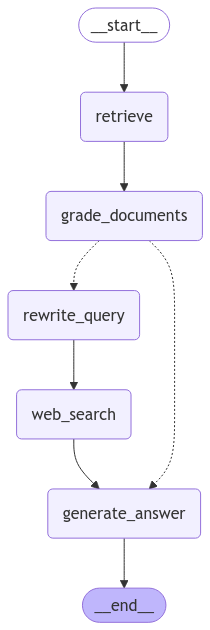

In [ ]:
from IPython.display import Image, display, Markdown

display(Image(agentic_rag.get_graph().draw_mermaid_png()))

## Test the Agentic CRAG System

In [ ]:
query = "what is the capital of India?"
response = agentic_rag.invoke({"question": query})

---RETRIEVAL FROM VECTOR DB---
---CHECK DOCUMENT RELEVANCE TO QUESTION---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---ASSESS GRADED DOCUMENTS---
---DECISION: GENERATE RESPONSE---
---GENERATE ANSWER---


In [ ]:
response

{'question': 'what is the capital of India?',
 'generation': 'The capital of India is New Delhi.',
 'web_search_needed': 'No',
 'documents': [Document(id='a1363031-c896-47e5-9bad-6a3726443180', metadata={'article_id': '5117', 'title': 'New Delhi'}, page_content='New Delhi () is the capital of India and a union territory of the megacity of Delhi. It has a very old history and is home to several monuments where the city is expensive to live in. In traditional Indian geography it falls under the North Indian zone. The city has an area of about 42.7\xa0km. New Delhi has a population of about 9.4 Million people.'),
  Document(id='85a45b0b-01b8-43b4-a018-ba22c665347e', metadata={'article_id': '1968', 'title': 'Capital city'}, page_content="A capital city (or capital town or just capital) is a city or town, specified by law or constitution, by the government of a country, or part of a country, such as a state, province or county. It usually serves as the location of the government's central m

In [ ]:
display(Markdown(response['generation']))

The capital of India is New Delhi.

In [ ]:
query = "Explain to me what are the key design patterns to build Agentic AI Systems?"
response = agentic_rag.invoke({"question": query})

---RETRIEVAL FROM VECTOR DB---
---CHECK DOCUMENT RELEVANCE TO QUESTION---
---NO DOCUMENTS RETRIEVED---
---ASSESS GRADED DOCUMENTS---
---DECISION: SOME or ALL DOCUMENTS ARE NOT RELEVANT TO QUESTION, REWRITE QUERY---
---REWRITE QUERY---
---WEB SEARCH---
---GENERATE ANSWER---


In [ ]:
response

{'question': 'Key design patterns for building agentic AI systems',
 'generation': 'The key design patterns for building agentic AI systems are:\n\n1.  **Reflection Pattern**: This pattern enables AI agents to evaluate and refine their outputs through self-critique and iterative improvement. The agent reviews its work, identifies flaws, and iterates to produce better results. This is useful in code generation, content creation, and problem-solving tasks.\n2.  **Tool Use Pattern**: This pattern empowers agents to interact with external resources like APIs, databases, or programming environments, allowing them to perform actions beyond their internal knowledge base. It is beneficial for tasks such as web search, data analysis, and automation.\n3.  **Planning Pattern**: This pattern allows agents to break down complex tasks into manageable steps, plan their execution, and adapt dynamically based on new information. It is particularly useful for project management, research, and workflow a

In [ ]:
display(Markdown(response['generation']))

The key design patterns for building agentic AI systems are:

1.  **Reflection Pattern**: This pattern enables AI agents to evaluate and refine their outputs through self-critique and iterative improvement. The agent reviews its work, identifies flaws, and iterates to produce better results. This is useful in code generation, content creation, and problem-solving tasks.
2.  **Tool Use Pattern**: This pattern empowers agents to interact with external resources like APIs, databases, or programming environments, allowing them to perform actions beyond their internal knowledge base. It is beneficial for tasks such as web search, data analysis, and automation.
3.  **Planning Pattern**: This pattern allows agents to break down complex tasks into manageable steps, plan their execution, and adapt dynamically based on new information. It is particularly useful for project management, research, and workflow automation.
4.  **Multi-Agent Pattern**: This pattern involves multiple specialized agents working together to achieve a common goal. Each agent has a specific role, and they communicate to ensure seamless task execution. It is applicable in software development, data analysis, and content creation.

In [ ]:
query = "Tell me about the financial capital of India"
response = agentic_rag.invoke({"question": query})

---RETRIEVAL FROM VECTOR DB---
---CHECK DOCUMENT RELEVANCE TO QUESTION---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---ASSESS GRADED DOCUMENTS---
---DECISION: SOME or ALL DOCUMENTS ARE NOT RELEVANT TO QUESTION, REWRITE QUERY---
---REWRITE QUERY---
---WEB SEARCH---
---GENERATE ANSWER---


In [ ]:
display(Markdown(response['generation']))

Mumbai, previously known as Bombay until 1996, is the financial capital of India. It is a natural harbor on the west coast of India and the capital city of Maharashtra state. Mumbai generates more than 6% of India's GDP and accounts for 25% of industrial output, 40% of sea trade, and 70% of capital to India's economy. The Reserve Bank of India, the Bombay Stock Exchange, the National Stock Exchange of India, and many Indian companies and multinational corporations are located in Mumbai.